<a href="https://colab.research.google.com/github/Wasiq-Rai/Vehicle-Prediction/blob/master/Vehicle_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # plotting library
import scipy                     # scientific computnig and technical computing
import cv2                       # working with, mainly resizing, images
import numpy as np               # dealing with arrays
import glob                      # return a possibly-empty list of path names that match pathname
import os                        # dealing with directories
import pandas as pd              # providing data structures and data analysis tools
import itertools
import random
import pickle
import seaborn as sns
from tensorflow import keras
from random import shuffle       # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm            # a nice pretty percentage bar for tasks. Thanks to viewer Daniel Bühler for this suggestion
from PIL import Image
from scipy import ndimage
from pathlib import Path
from tensorflow.keras import layers , regularizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
%matplotlib inline
np.random.seed(1)
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

##Data Preprocessing

In [ ]:
# Set the input image size
input_shape = (150, 150, 3)

# Define the train and test data directories
train_dir = '/content/drive/MyDrive/Vehicle Data Set/cardataset/train'
test_dir = '/content/drive/MyDrive/Vehicle Data Set/cardataset/test'


In [ ]:
train_categories=os.listdir(train_dir)
num_classes=len(train_categories)
print("Total Categories of Vehicles: "+str(num_classes))


Total Categories of Vehicles: 16


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical'
)

Found 22528 images belonging to 16 classes.


Total Class Names

In [ ]:
class_names = list(train_generator.class_indices.keys())
print("Class Names:")
for class_name in class_names:
    print(class_name)


Class Names:
Ambulance
Barge
Bicycle
Boat
Bus
Car
Cart
Helicopter
Limousine
Motorcycle
Segway
Snowmobile
Tank
Taxi
Truck
Van


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical'
)



Found 5130 images belonging to 16 classes.


/content/drive/MyDrive/Vehicle Data Set/cardataset/train/Ambulance
(462, 966, 3)
/content/drive/MyDrive/Vehicle Data Set/cardataset/train/Barge
(573, 2628, 3)
/content/drive/MyDrive/Vehicle Data Set/cardataset/train/Bicycle
(1384, 1552, 3)
/content/drive/MyDrive/Vehicle Data Set/cardataset/train/Boat
(607, 3207, 3)
/content/drive/MyDrive/Vehicle Data Set/cardataset/train/Bus
(343, 221, 3)
/content/drive/MyDrive/Vehicle Data Set/cardataset/train/Car
(166, 333, 3)
/content/drive/MyDrive/Vehicle Data Set/cardataset/train/Cart
(1758, 1107, 3)
/content/drive/MyDrive/Vehicle Data Set/cardataset/train/Helicopter
(1505, 2443, 3)
/content/drive/MyDrive/Vehicle Data Set/cardataset/train/Limousine
(1085, 2720, 3)
/content/drive/MyDrive/Vehicle Data Set/cardataset/train/Motorcycle
(2764, 3728, 3)
/content/drive/MyDrive/Vehicle Data Set/cardataset/train/Segway
(868, 662, 3)
/content/drive/MyDrive/Vehicle Data Set/cardataset/train/Snowmobile
(760, 1500, 3)
/content/drive/MyDrive/Vehicle Data Set/car

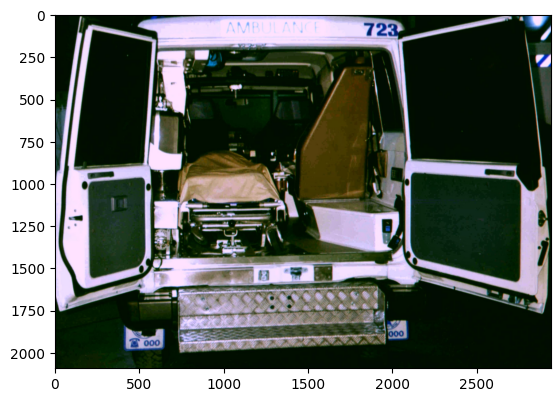

In [ ]:
train_categories=os.listdir(train_dir)
for i in train_categories:
    b=os.path.join(train_dir,i)
    print(b)
    c=os.listdir(os.path.join(train_dir,i))
    for j in c:
        d=os.path.join(b,j)
        img=cv2.imread(d)
        print(img.shape)
        
        plt.imshow(img)
        break

Random sample Images

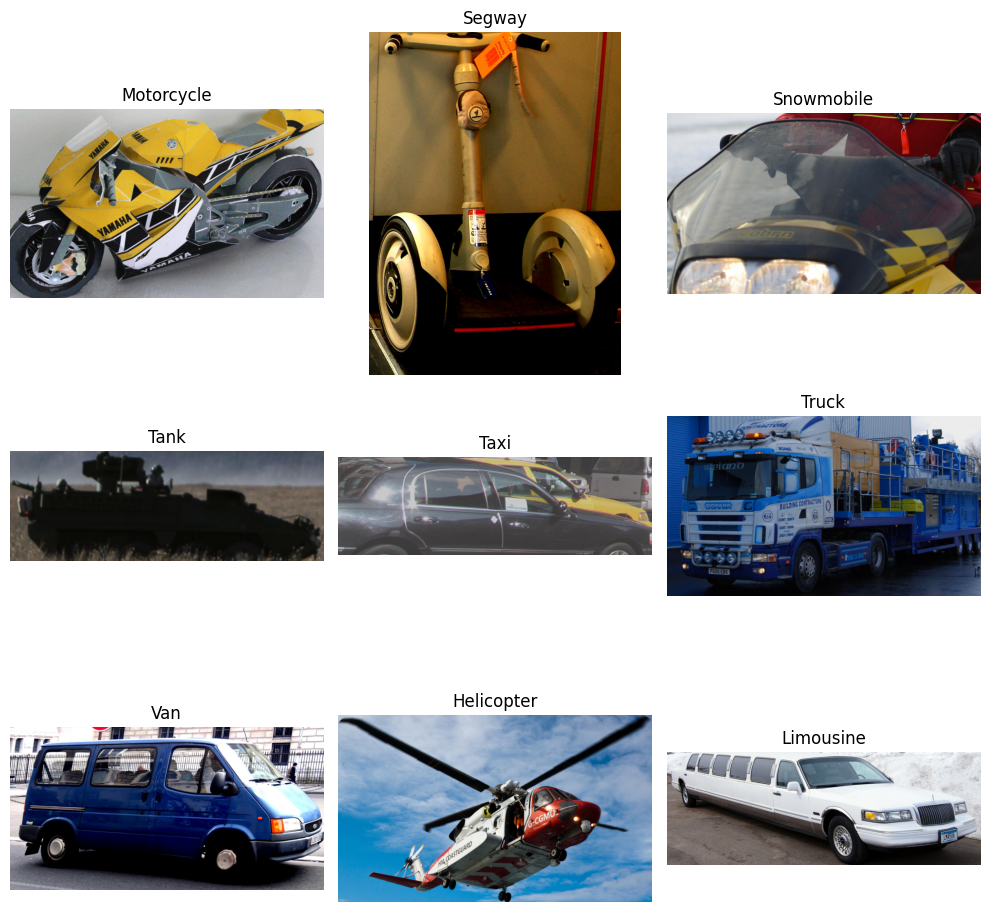

In [ ]:
import random
import matplotlib.pyplot as plt
import os
import cv2

# Get the list of all categories in the training directory
train_categories = os.listdir(train_dir)

plt.figure(figsize=(10, 10))
for i, category in enumerate(train_categories):
    category_path = os.path.join(train_dir, category)
    image_files = os.listdir(category_path)
    random_images = random.sample(image_files, 1)

    for image_file in random_images:
        image_path = os.path.join(category_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Display the image
        ax = plt.subplot(3, 3,i % 9 + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis("off")
        break

plt.tight_layout()
plt.show()


Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

##Training the Model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/5
704/704 [==============================] - 2167s 3s/step - loss: 0.7699 - accuracy: 0.7499 - val_loss: 1.0970 - val_accuracy: 0.6764
Epoch 2/5
704/704 [==============================] - 2149s 3s/step - loss: 0.7098 - accuracy: 0.7667 - val_loss: 1.1291 - val_accuracy: 0.6811
Epoch 3/5
704/704 [==============================] - 2135s 3s/step - loss: 0.6563 - accuracy: 0.7828 - val_loss: 1.0771 - val_accuracy: 0.6807
Epoch 4/5
704/704 [==============================] - 2136s 3s/step - loss: 0.6104 - accuracy: 0.7989 - val_loss: 1.1076 - val_accuracy: 0.6658
Epoch 5/5
704/704 [==============================] - 2146s 3s/step - loss: 0.5668 - accuracy: 0.8112 - val_loss: 1.1739 - val_accuracy: 0.6834


#Saving the Model

In [ ]:
    pickle.dump(model, open('vehicle_trained_model.pkl', 'wb'))

##Training progress

The figure below shows how the training and validation accuracy and loss evolve over the epochs.

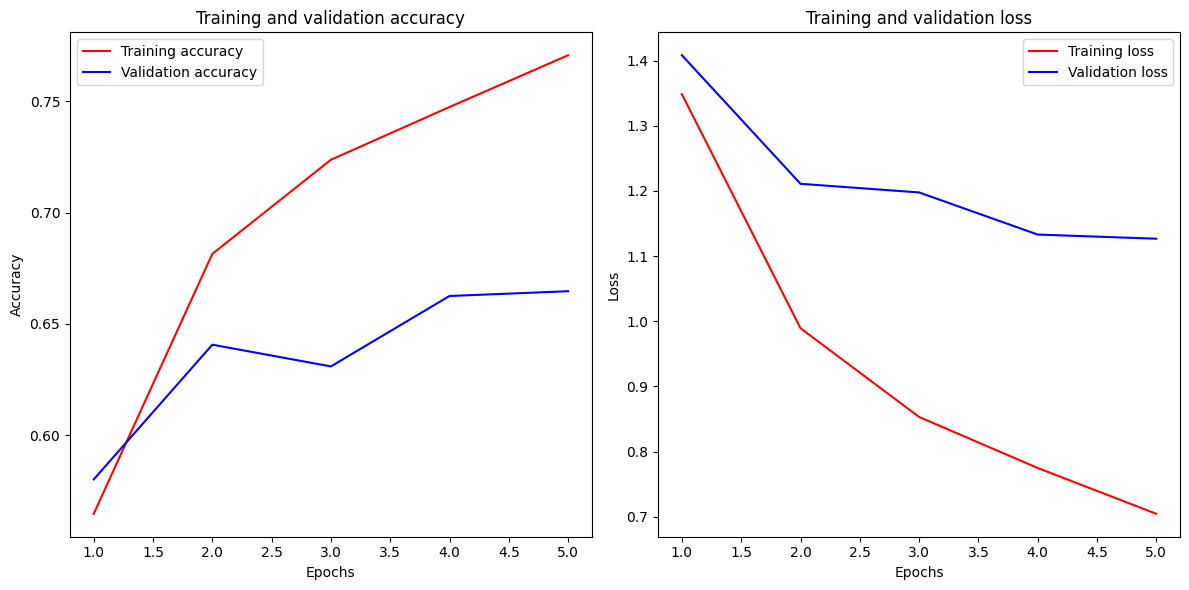

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'red', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
score = model.evaluate(test_generator)

161/161 [==============================] - 245s 2s/step - loss: 1.1262 - accuracy: 0.6651


In [ ]:

test_ds = tf.keras.utils.image_dataset_from_directory( 
    test_dir, 
    seed = 123, 
    image_size=(150,150),
    shuffle=False, #No shuffling for classification report
    batch_size=32
)
predictions = model.predict(test_ds)
score_pred = tf.nn.softmax(predictions)

Found 5130 files belonging to 16 classes.
161/161 [==============================] - 179s 1s/step


##Testing the Model

1/1 [==============================] - 0s 75ms/step
This image most likely is a Bicycle with a 15.34 percent confidence.


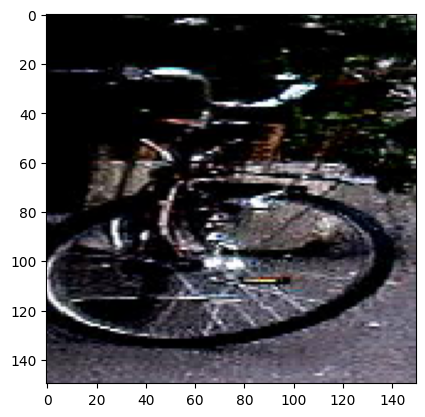

In [ ]:
test_pic_url = "/content/drive/MyDrive/Vehicle Data Set/cardataset/test/Bicycle/004949_18.jpg"
img = tf.keras.utils.load_img(test_pic_url, target_size=(150, 150))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # create a batch
plt.imshow(img)

predictions_pic = model.predict(img_array)
score_pic = tf.nn.softmax(predictions_pic[0])
print(
    "This image most likely is a {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_pic)], 100 * np.max(score_pic))
)

1/1 [==============================] - 0s 190ms/step
This image most likely is a Helicopter with a 15.34 percent confidence.


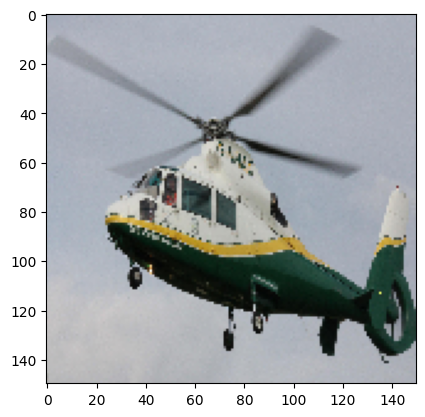

In [ ]:
test_pic_url = "/content/drive/MyDrive/Vehicle Data Set/cardataset/test/Helicopter/003492_00.jpg"
img = tf.keras.utils.load_img(test_pic_url, target_size=(150, 150))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # create a batch
plt.imshow(img)

predictions_pic = model.predict(img_array)
score_pic = tf.nn.softmax(predictions_pic[0])
print(
    "This image most likely is a {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_pic)], 100 * np.max(score_pic))
)

1/1 [==============================] - 0s 128ms/step
This image most likely is a Boat with a 15.34 percent confidence.


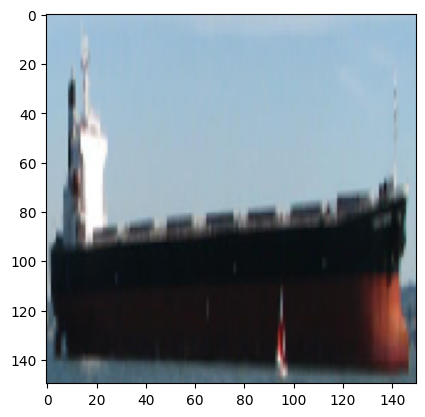

In [ ]:
test_pic_url = "/content/drive/MyDrive/Vehicle Data Set/cardataset/test/Boat/004742_17.jpg"
img = tf.keras.utils.load_img(test_pic_url, target_size=(150, 150))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # create a batch
plt.imshow(img)

predictions_pic = model.predict(img_array)
score_pic = tf.nn.softmax(predictions_pic[0])
print(
    "This image most likely is a {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_pic)], 100 * np.max(score_pic))
)

1/1 [==============================] - 0s 78ms/step
This image most likely is a Boat with a 15.34 percent confidence.


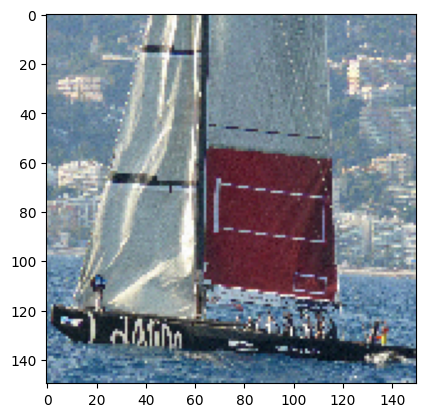

In [ ]:
test_pic_url = "/content/drive/MyDrive/Vehicle Data Set/cardataset/test/Boat/004770_05.jpg"
img = tf.keras.utils.load_img(test_pic_url, target_size=(150, 150))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # create a batch
plt.imshow(img)

predictions_pic = model.predict(img_array)
score_pic = tf.nn.softmax(predictions_pic[0])
print(
    "This image most likely is a {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_pic)], 100 * np.max(score_pic))
)

In [ ]:
test_pic_url = "/content/drive/MyDrive/Vehicle Data Set/cardataset/test/Bicycle/004949_18.jpg"
img = tf.keras.utils.load_img(test_pic_url, target_size=(150, 150))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # create a batch
plt.imshow(img)

predictions_pic = model.predict(img_array)
score_pic = tf.nn.softmax(predictions_pic[0])
print(
    "This image most likely is a {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_pic)], 100 * np.max(score_pic))
)

##Classification Report

In [ ]:
test_images, test_labels = tuple(zip(*test_ds))


y_test = np.concatenate(test_labels) 
y_pred = np.array([np.argmax(s) for s in score_pred])

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

   Ambulance       0.57      0.18      0.28        44
       Barge       0.00      0.00      0.00        42
     Bicycle       0.87      0.34      0.49       122
        Boat       0.42      0.91      0.57       786
         Bus       0.80      0.61      0.69       351
         Car       0.64      0.56      0.60      1373
        Cart       0.00      0.00      0.00        29
  Helicopter       0.87      0.58      0.70       151
   Limousine       0.00      0.00      0.00        63
  Motorcycle       0.69      0.82      0.75       797
      Segway       0.79      0.23      0.36        65
  Snowmobile       0.37      0.15      0.22        46
        Tank       1.00      0.05      0.09        85
        Taxi       0.58      0.48      0.53       221
       Truck       0.54      0.34      0.41       559
         Van       0.60      0.39      0.47       396

    accuracy                           0.58      5130
   macro avg       0.55   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Confusion Matrix

In [ ]:
# Get the true labels and predicted labels
true_labels = []
predicted_labels = []
classes= []
for images, labels in test_ds:
    classes= class_names[i]
    true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)



1/1 [==============================] - 0s 151ms/step


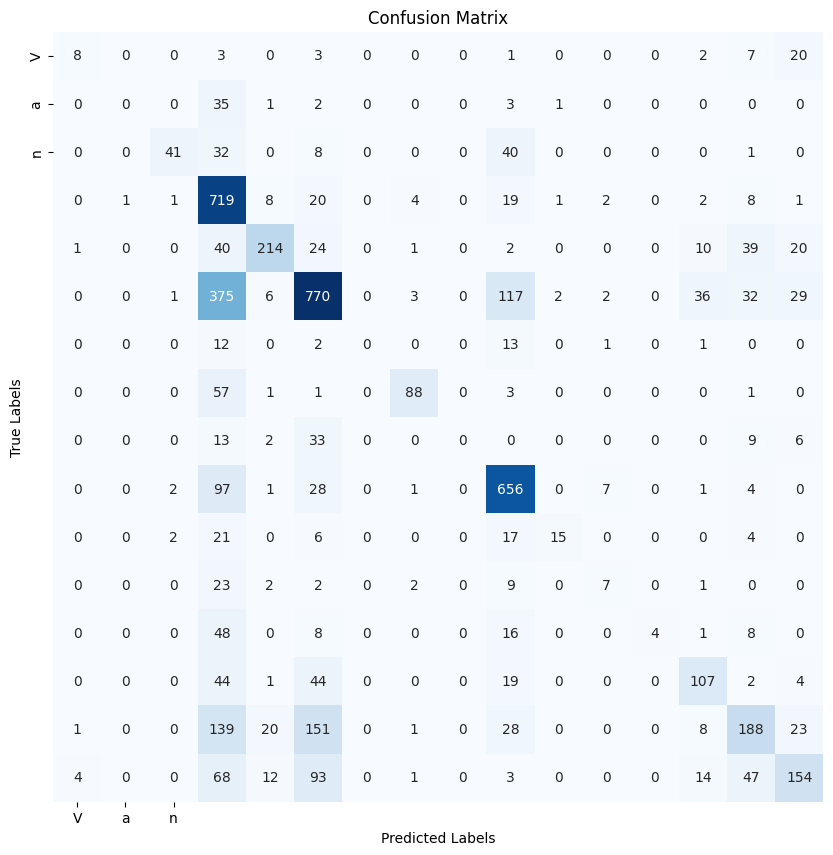

In [ ]:

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Get a selection of images
train_ds = tf.keras.utils.image_dataset_from_directory( 
    train_dir, 
    validation_split=0.2, 
    subset= 'training', 
    seed = 123, 
    image_size=(150,150),
    batch_size=32
)

image_batch, label_batch = next(iter(train_ds))
prediction_batch = model.predict(image_batch)
score_batch = tf.nn.softmax(prediction_batch)

Found 22528 files belonging to 16 classes.
Using 18023 files for training.
1/1 [==============================] - 0s 442ms/step


##Predictions

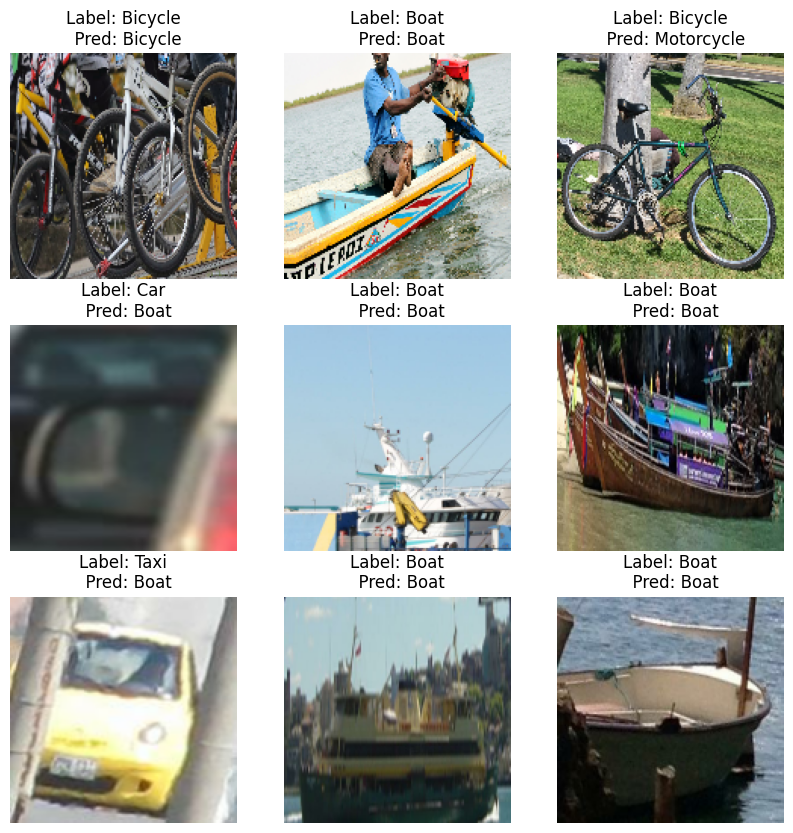

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title( "Label: " + class_names[label] + "\n  Pred: " + class_names[np.argmax(score_batch[i])])
  plt.axis("off")

##Summary
Vehicles images were classified using a CNN. The classifier has an average accuracy of roughly 80% when identifiying images of single vehicle. The identification for images taken under more realistic conditions, rather than the test set images which are very similar to the training set images, could be further improved using the full sized images rather than the 150x150 pixel version and applying further & larger data augmentation steps. Ideally one would also have some training data with various backgrounds.